In [1]:
import numpy as np                #arrays
import pandas as pd               #data frame
import matplotlib.pyplot as plt   #image showing 
import seaborn as sn              #for plotting of pca
from scipy.linalg import eigh     #for eigen value and vector calculations
from sklearn import decomposition #data standardlerization
import tensorflow as tf
#dataset: https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset

In [45]:
N_CATS = 1000;
N_DOGS = 1000;

IMG_SIZE = (28,28)

d0 = pd.DataFrame()

for i in range(N_CATS):
    img = tf.keras.preprocessing.image.load_img('PetImages/Cat/'+str(i)+'.jpg', color_mode='grayscale', target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    row = img_array.flatten()
    d0 = d0.append(pd.Series(row), ignore_index=True)

In [46]:
d0["label"]='cat'
d0

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,174.0,187.0,197.0,204.0,210.0,216.0,177.0,163.0,144.0,103.0,...,27.0,6.0,5.0,30.0,28.0,9.0,5.0,3.0,3.0,cat
1,36.0,41.0,45.0,45.0,43.0,51.0,69.0,65.0,71.0,63.0,...,70.0,27.0,33.0,63.0,59.0,91.0,57.0,57.0,40.0,cat
2,189.0,80.0,47.0,57.0,97.0,134.0,62.0,155.0,57.0,170.0,...,44.0,57.0,80.0,76.0,67.0,48.0,51.0,46.0,51.0,cat
3,182.0,179.0,194.0,185.0,189.0,160.0,166.0,175.0,112.0,176.0,...,113.0,124.0,84.0,119.0,161.0,168.0,158.0,182.0,166.0,cat
4,152.0,172.0,179.0,183.0,187.0,188.0,191.0,193.0,192.0,198.0,...,14.0,12.0,10.0,12.0,15.0,10.0,14.0,10.0,14.0,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46.0,41.0,173.0,166.0,165.0,163.0,164.0,157.0,154.0,158.0,...,217.0,213.0,213.0,211.0,213.0,213.0,218.0,220.0,213.0,cat
996,164.0,161.0,155.0,152.0,150.0,146.0,135.0,138.0,132.0,148.0,...,164.0,115.0,146.0,131.0,131.0,123.0,123.0,124.0,120.0,cat
997,161.0,160.0,146.0,148.0,68.0,146.0,164.0,115.0,186.0,188.0,...,153.0,212.0,144.0,187.0,199.0,91.0,107.0,68.0,125.0,cat
998,232.0,232.0,232.0,229.0,234.0,235.0,232.0,229.0,235.0,228.0,...,231.0,236.0,227.0,231.0,229.0,232.0,231.0,233.0,235.0,cat


In [47]:
for i in range(N_DOGS):
    img = tf.keras.preprocessing.image.load_img('PetImages/Dog/'+str(i)+'.jpg', color_mode='grayscale', target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    row = img_array.flatten()
    d0 = d0.append(pd.Series(row), ignore_index=True)

In [48]:
d0.loc[d0["label"].isna(), "label"] = "Dog"

In [49]:
d0

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,174.0,187.0,197.0,204.0,210.0,216.0,177.0,163.0,144.0,103.0,...,27.0,6.0,5.0,30.0,28.0,9.0,5.0,3.0,3.0,cat
1,36.0,41.0,45.0,45.0,43.0,51.0,69.0,65.0,71.0,63.0,...,70.0,27.0,33.0,63.0,59.0,91.0,57.0,57.0,40.0,cat
2,189.0,80.0,47.0,57.0,97.0,134.0,62.0,155.0,57.0,170.0,...,44.0,57.0,80.0,76.0,67.0,48.0,51.0,46.0,51.0,cat
3,182.0,179.0,194.0,185.0,189.0,160.0,166.0,175.0,112.0,176.0,...,113.0,124.0,84.0,119.0,161.0,168.0,158.0,182.0,166.0,cat
4,152.0,172.0,179.0,183.0,187.0,188.0,191.0,193.0,192.0,198.0,...,14.0,12.0,10.0,12.0,15.0,10.0,14.0,10.0,14.0,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,76.0,75.0,73.0,72.0,69.0,68.0,63.0,63.0,60.0,55.0,...,80.0,79.0,88.0,73.0,82.0,76.0,73.0,71.0,71.0,Dog
1996,120.0,104.0,118.0,115.0,53.0,68.0,78.0,52.0,81.0,46.0,...,220.0,204.0,206.0,209.0,198.0,211.0,221.0,222.0,240.0,Dog
1997,174.0,147.0,162.0,155.0,141.0,154.0,143.0,159.0,90.0,173.0,...,144.0,155.0,172.0,141.0,130.0,210.0,154.0,103.0,161.0,Dog
1998,83.0,84.0,88.0,91.0,91.0,93.0,95.0,98.0,98.0,99.0,...,23.0,27.0,28.0,52.0,39.0,55.0,77.0,101.0,99.0,Dog


In [50]:
# d0 = pd.read_csv('train.csv')     #dataset
d0.shape

(2000, 785)

In [51]:
print(d0.head(5))   #printing data frame

       0      1      2      3      4      5      6      7      8      9  ...  \
0  174.0  187.0  197.0  204.0  210.0  216.0  177.0  163.0  144.0  103.0  ...   
1   36.0   41.0   45.0   45.0   43.0   51.0   69.0   65.0   71.0   63.0  ...   
2  189.0   80.0   47.0   57.0   97.0  134.0   62.0  155.0   57.0  170.0  ...   
3  182.0  179.0  194.0  185.0  189.0  160.0  166.0  175.0  112.0  176.0  ...   
4  152.0  172.0  179.0  183.0  187.0  188.0  191.0  193.0  192.0  198.0  ...   

     775    776   777    778    779    780    781    782    783  label  
0   27.0    6.0   5.0   30.0   28.0    9.0    5.0    3.0    3.0    cat  
1   70.0   27.0  33.0   63.0   59.0   91.0   57.0   57.0   40.0    cat  
2   44.0   57.0  80.0   76.0   67.0   48.0   51.0   46.0   51.0    cat  
3  113.0  124.0  84.0  119.0  161.0  168.0  158.0  182.0  166.0    cat  
4   14.0   12.0  10.0   12.0   15.0   10.0   14.0   10.0   14.0    cat  

[5 rows x 785 columns]


In [52]:
d0.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,174.0,187.0,197.0,204.0,210.0,216.0,177.0,163.0,144.0,103.0,...,27.0,6.0,5.0,30.0,28.0,9.0,5.0,3.0,3.0,cat
1,36.0,41.0,45.0,45.0,43.0,51.0,69.0,65.0,71.0,63.0,...,70.0,27.0,33.0,63.0,59.0,91.0,57.0,57.0,40.0,cat
2,189.0,80.0,47.0,57.0,97.0,134.0,62.0,155.0,57.0,170.0,...,44.0,57.0,80.0,76.0,67.0,48.0,51.0,46.0,51.0,cat
3,182.0,179.0,194.0,185.0,189.0,160.0,166.0,175.0,112.0,176.0,...,113.0,124.0,84.0,119.0,161.0,168.0,158.0,182.0,166.0,cat
4,152.0,172.0,179.0,183.0,187.0,188.0,191.0,193.0,192.0,198.0,...,14.0,12.0,10.0,12.0,15.0,10.0,14.0,10.0,14.0,cat


In [53]:
X = d0.iloc[:, :-1].values   #selection of columns(from 1 to second last)
y = d0.iloc[:, -1].values    #selection of columns(only last column)
l = d0['label']             #l=label class of data frame
d = d0.drop("label",axis=1) #d=full data frame except labels

print(d.shape)
print(l.shape)

(2000, 784)
(2000,)


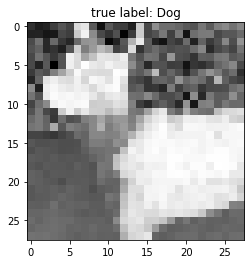

In [55]:
def plot_pet(X, y, idx):               #function for showing image at index idx
    img = X[idx].reshape(28,28)          #matrix manilpulatation for clear image
    plt.imshow(img, cmap='Greys')        #printing image in grey scale
    plt.title('true label: %s' % y[idx]) #answer to the image printed
    plt.show()

plot_pet(X, y, 1003)  

In [56]:
#sub setting of data frame
labels = l.head(2000)  
data = d.head(2000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (2000, 784)


In [57]:
from sklearn.preprocessing import StandardScaler         #data transformation
standardized_data = StandardScaler().fit_transform(data) #data standardisation
print(standardized_data.shape)

(2000, 784)


In [58]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T , sample_data)        #multiplication of matrices
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [59]:
#calculation of eigen values and vectors
values, vectors = eigh(covar_matrix, eigvals=(782,783))   
print(values)
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

[166783.84 305361.1 ]
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [60]:
#compression
new_coordinates = np.matmul(vectors, sample_data.T)
print ("Resultant new data points' shape:", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

Resultant new data points' shape: (2, 784) X (784, 2000)  =  (2, 2000)


In [61]:
new_coordinates = np.vstack((new_coordinates, labels)).T   #merging of matrices row wise and traspose it
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label")) # convert above into dataframe
print(dataframe.tail())

     1st_principal 2nd_principal label
1995      -3.59884       15.7984   Dog
1996       1.50517       11.6773   Dog
1997        2.1702       2.84658   Dog
1998       4.02425       14.6778   Dog
1999      -4.36866      -17.4427   Dog


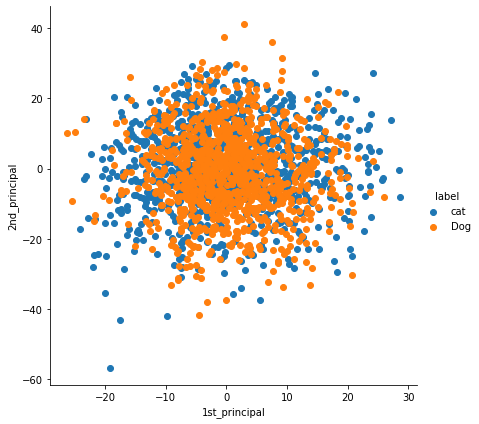

In [62]:
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()